## Discretisation

Discretisation is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that span the range of the variable's values. Discretisation is also called **binning**, where bin is an alternative name for interval.

### Discretisation helps handle outliers and may improve value spread in skewed variables

Discretisation helps handle outliers by placing these values into the lower or higher intervals, together with the remaining inlier values of the distribution. Thus, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval / bucket. In addition, by creating appropriate bins or intervals, discretisation can help spread the values of a skewed variable across a set of bins with equal number of observations


### Discretisation approaches

There are several approaches to transform continuous variables into discrete ones. Discretisation methods fall into 2 categories: **supervised and unsupervised**. Unsupervised methods do not use any information, other than the variable distribution, to create the contiguous bins in which the values will be placed. Supervised methods typically use target information in order to create the bins or intervals.


####  Unsupervised discretisation methods

- Equal width discretisation
- Equal frequency discretisation
- K-means discretisation

#### Supervised discretisation methods

- Discretisation using decision trees

# Equal width discretisation

width = (max value - min value) / N

where N is the number of bins or intervals.

equal width binning using the Titanic dataset with

### pandas and NumPy
                                   pd.cut(x=X_train['age'],
                                    bins=intervals,
                                    labels=labels,
                                    include_lowest=True)
                                    
### Feature-engine 

                          EqualWidthDiscretiser(bins=10, variables = ['age', 'fare']) 

### Scikit-learn
                         KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer

from feature_engine.discretisers import EqualWidthDiscretiser

In [50]:
data = pd.read_csv('D:/ShakthiSai -Keerthana Learnings/AI and Machine Learning/Feature Engineering/titanic_train.csv',
                   usecols=['Age', 'Fare', 'Survived'])

data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [51]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [52]:
X=data[['Age', 'Fare']]

In [53]:
X.dtypes

Age     float64
Fare    float64
dtype: object

In [55]:
y=data['Survived']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [57]:
X_train.shape, X_test.shape

((623, 2), (268, 2))

## Remove missing values using random sample imputation method

In [58]:
def impute_na(data, variable):

    df = data.copy()

    # random sampling
    df[variable + '_random'] = df[variable]

    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + '_random'] = random_sample

    return df[variable + '_random']

In [59]:
# replace NA in both  train and test sets

X_train['Age'] = impute_na(data, 'Age')
X_test['Age'] = impute_na(data, 'Age')

X_train['Fare'] = impute_na(data, 'Fare')
X_test['Fare'] = impute_na(data, 'Fare')

C:\Users\Vikee\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vikee\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Vikee\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [60]:
X_train['Age'].isnull().sum()

0

In [61]:
X_train['Fare'].isnull().sum()

0

## 1) Equal width discretisation with Scikit-learn

#### strategy=uniform indicates equal width discretisation

In [65]:
equ_widthbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

equ_widthbins.fit(X_train[['Age', 'Fare']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [66]:
equ_widthbins.bin_edges_  ## first array is for age and second array for fare gives the bin interavals

array([array([ 0.67 ,  8.603, 16.536, 24.469, 32.402, 40.335, 48.268, 56.201,
       64.134, 72.067, 80.   ]),
       array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
       307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ])],
      dtype=object)

In [67]:
train_t = equ_widthbins.transform(X_train[['Age', 'Fare']])

train_t = pd.DataFrame(train_t, columns = ['Age', 'Fare'])

train_t.head()

,Age,Fare
0,6.0,0.0
1,6.0,1.0
2,0.0,0.0
3,6.0,1.0
4,1.0,0.0


In [69]:
test_t = equ_widthbins.transform(X_test[['Age', 'Fare']])

test_t = pd.DataFrame(test_t, columns = ['Age', 'Fare'])

test_t.head()

,Age,Fare
0,5.0,0.0
1,2.0,0.0
2,0.0,0.0
3,4.0,2.0
4,3.0,0.0


## 2) Equal width discretisation with Feature-engine

In [72]:
equ_widthbins1= EqualWidthDiscretiser(bins=10, variables = ['Age', 'Fare'])

equ_widthbins1.fit(X_train)

EqualWidthDiscretiser(variables=['Age', 'Fare'])

In [73]:
# in the binner dict, we can see the limits of the intervals. first array for age and next for fare
# next, but it increases always the same value, aka, same width.

equ_widthbins1.binner_dict_

{'Age': [-inf,
  8.603,
  16.536,
  24.469,
  32.402,
  40.335,
  48.268,
  56.201,
  64.134,
  72.067,
  inf],
 'Fare': [-inf,
  51.23292,
  102.46584,
  153.69876,
  204.93168,
  256.1646,
  307.39752,
  358.63044,
  409.86336,
  461.09628,
  inf]}

In [74]:
train_t1 = equ_widthbins1.transform(X_train)
test_t1 = equ_widthbins1.transform(X_test)

In [75]:
train_t1.head()

,Age,Fare
857,6,0
52,6,1
386,0,0
124,6,1
578,1,0


In [76]:
test_t1.head()

,Age,Fare
495,5,0
648,2,0
278,0,0
31,4,2
255,3,0


## 3) Equal width discretisation with  Pandas and NUmpy

In [79]:
# let's capture the range of the variable age

# let's capture the range of the variable age

age_range = X_train['Age'].max() - X_train['Age'].min()

age_range

79.33

In [81]:
# let's divide the range into 10 equal width bins
age_range / 10

7.933

In [82]:
# now let's capture the lower and upper boundaries

min_value = int(np.floor( X_train['Age'].min()))
max_value = int(np.ceil( X_train['Age'].max()))

# let's round the bin width
inter_value = int(np.round(age_range / 10))

min_value, max_value, inter_value

(0, 80, 8)

In [86]:
intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]

intervals



[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80]

In [85]:
labels = ['Bin_' + str(i) for i in range(1, len(intervals))]

labels

['Bin_1',
 'Bin_2',
 'Bin_3',
 'Bin_4',
 'Bin_5',
 'Bin_6',
 'Bin_7',
 'Bin_8',
 'Bin_9',
 'Bin_10']

In [87]:
# create binned age / discretise age

# create one column with labels
X_train['Age_disc_labels'] = pd.cut(x=X_train['Age'],
                                    bins=intervals,
                                    labels=labels,
                                    include_lowest=True)

# and one with bin boundaries
X_train['Age_disc'] = pd.cut(x=X_train['Age'],
                             bins=intervals,
                             include_lowest=True)

X_train.head(10)

C:\Users\Vikee\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Vikee\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Age,Fare,Age_disc_labels,Age_disc
857,51.0,26.5500,Bin_7,"(48.0, 56.0]"
52,49.0,76.7292,Bin_7,"(48.0, 56.0]"
386,1.0,46.9000,Bin_1,"(-0.001, 8.0]"
124,54.0,77.2875,Bin_7,"(48.0, 56.0]"
578,14.5,14.4583,Bin_2,"(8.0, 16.0]"
549,8.0,36.7500,Bin_1,"(-0.001, 8.0]"
118,24.0,247.5208,Bin_3,"(16.0, 24.0]"
12,20.0,8.0500,Bin_3,"(16.0, 24.0]"
157,30.0,8.0500,Bin_4,"(24.0, 32.0]"
127,24.0,7.1417,Bin_3,"(16.0, 24.0]"


In [88]:
X_train.groupby('Age_disc')['Age'].count()

Age_disc
(-0.001, 8.0]     49
(8.0, 16.0]       36
(16.0, 24.0]     147
(24.0, 32.0]     146
(32.0, 40.0]     112
(40.0, 48.0]      68
(48.0, 56.0]      37
(56.0, 64.0]      19
(64.0, 72.0]       7
(72.0, 80.0]       2
Name: Age, dtype: int64

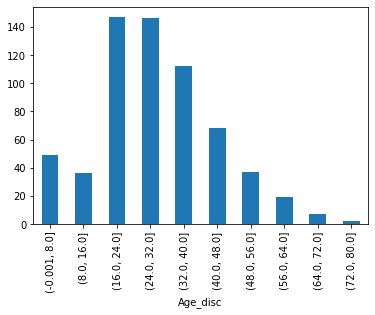

In [89]:
X_train.groupby('Age_disc')['Age'].count().plot.bar()